#**Importing Libraries**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Loading the Datasets**

In [58]:
iris=pd.read_csv("/content/Iris (1).csv")

iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
titanic = pd.read_csv('/content/titanic (1).csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#**Code for Summary of Statistics**

In [60]:


def summarize_numerical(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Total Instances': len(df),
        'Number of Nulls': df.isnull().sum(),
        'Number of Outliers': df.apply(lambda x: np.sum((x < (x.mean() - 3*x.std())) | (x > (x.mean() + 3*x.std())))),
        'Min Value': df.min(),
        'Max Value': df.max(),
        'Mode': df.mode().iloc[0],
        'Mean': df.mean(),
        'Median': df.median(),
        'Variance': df.var(),
        'Std Dev': df.std()
    })
    return summary


# **1). Iris Data**


## 1). Dropping the ID Column

In [61]:
iris.drop(columns=['Id'], inplace=True)

display(iris.head())



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2). Summary of Statistics

In [62]:

iris_numerical_summary = summarize_numerical(iris.drop(columns=['Species']))

display(iris_numerical_summary)

,Data Type,Total Instances,Number of Nulls,Number of Outliers,Min Value,Max Value,Mode,Mean,Median,Variance,Std Dev
SepalLengthCm,float64,150,0,0,4.3,7.9,5.0,5.843333,5.80,0.685694,0.828066
SepalWidthCm,float64,150,0,1,2.0,4.4,3.0,3.054000,3.00,0.188004,0.433594
PetalLengthCm,float64,150,0,0,1.0,6.9,1.5,3.758667,4.35,3.113179,1.764420
PetalWidthCm,float64,150,0,0,0.1,2.5,0.2,1.198667,1.30,0.582414,0.763161


## 3). Visualization

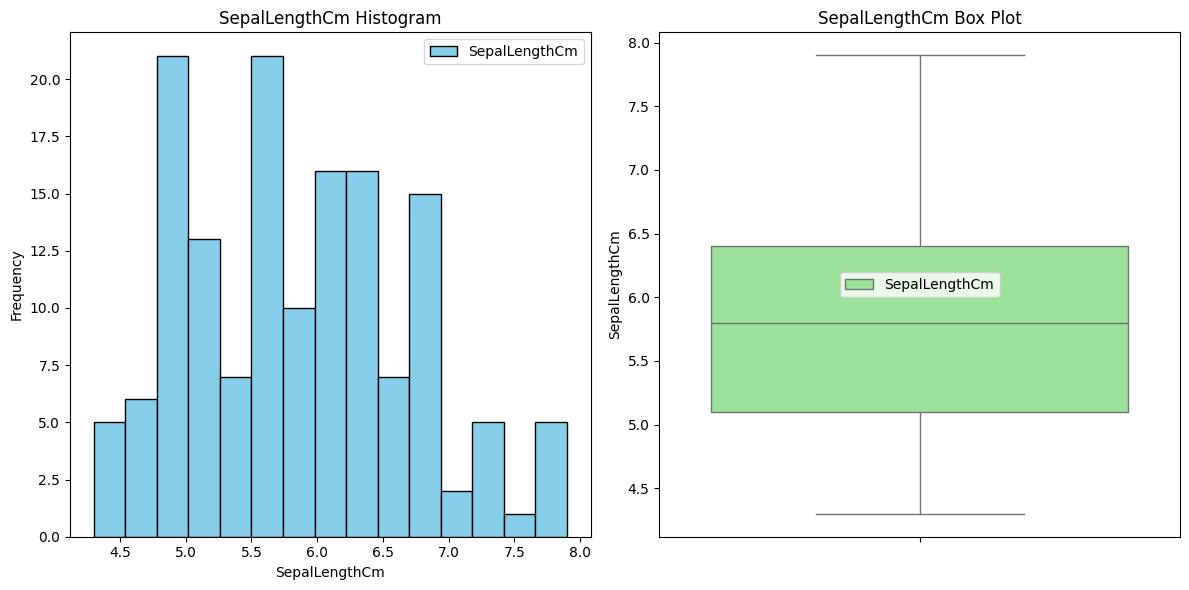

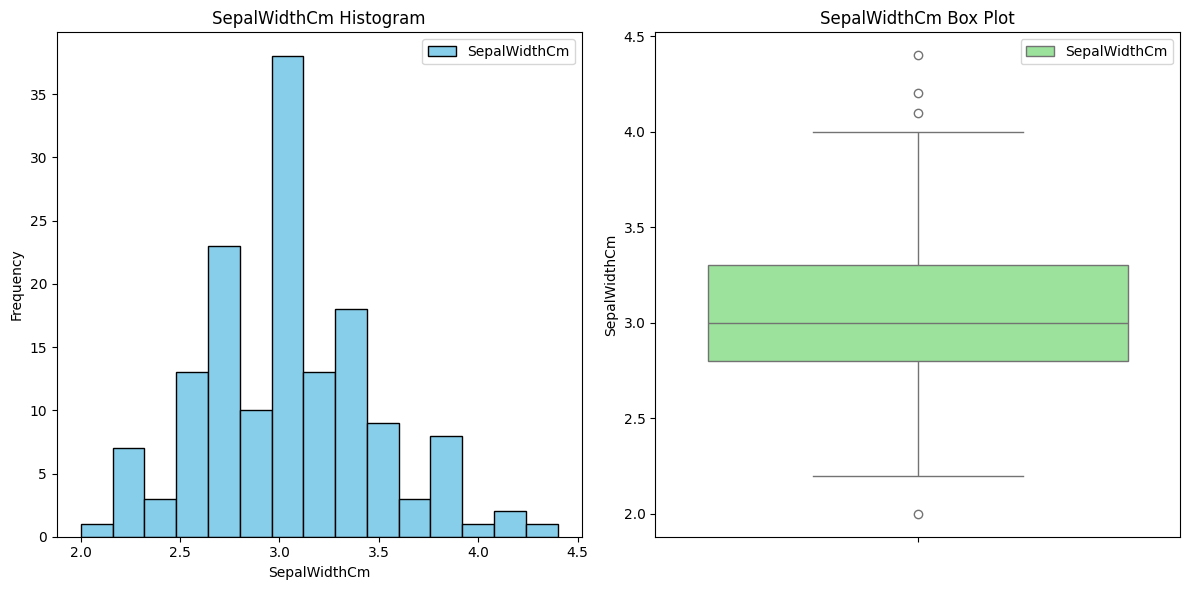

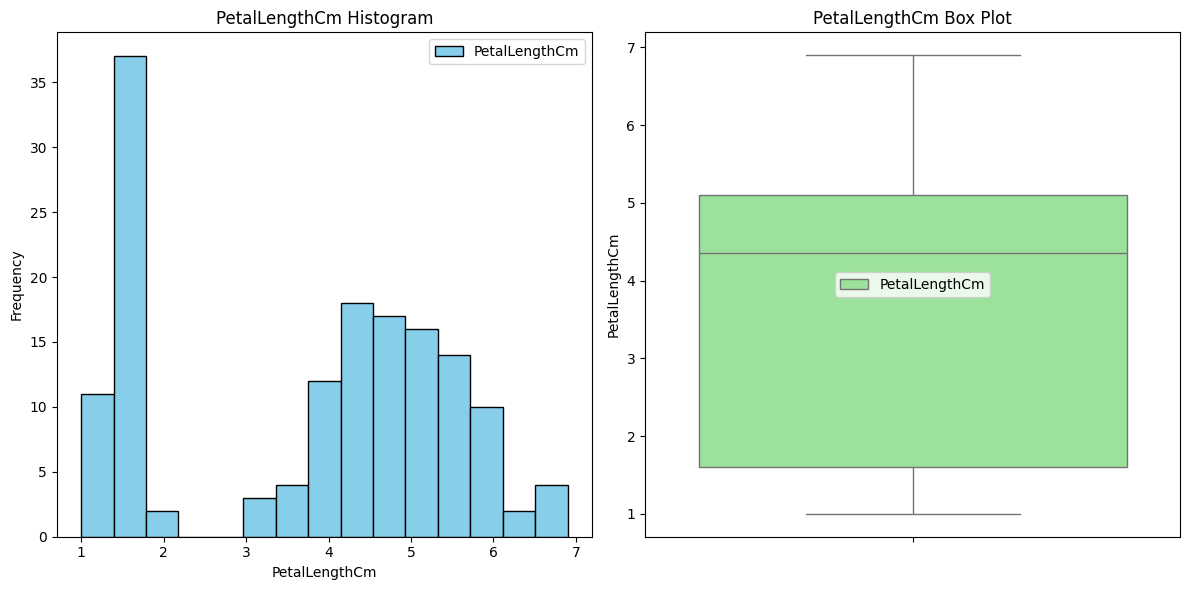

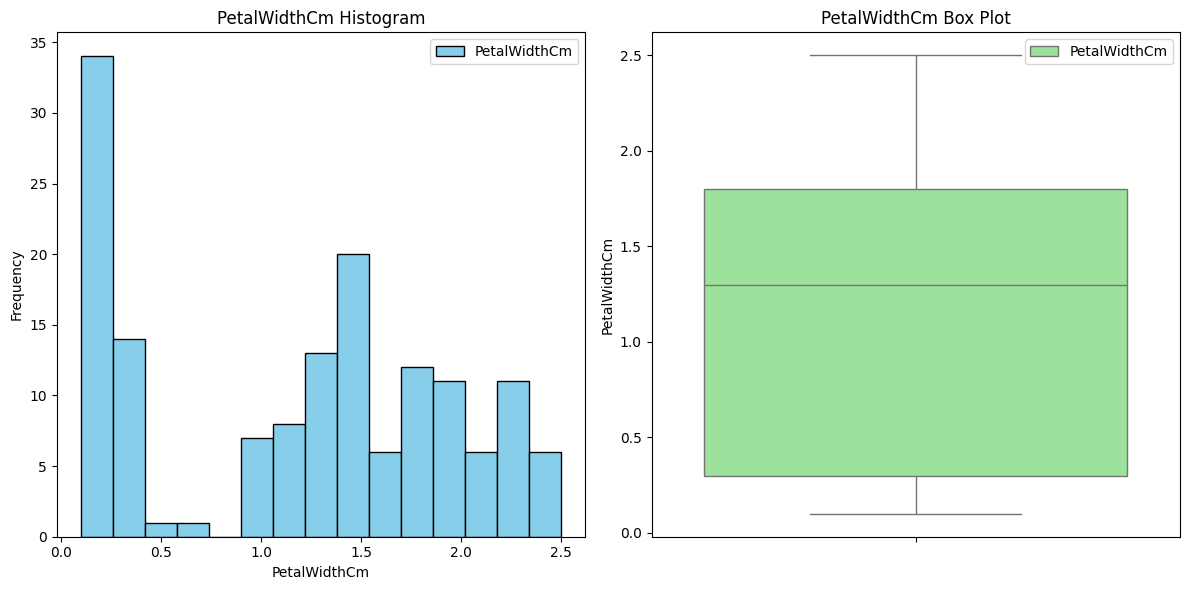

In [63]:

for column in iris.columns[:-1]:

    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.hist(iris[column], bins=15, color='skyblue', edgecolor='black', label=column)
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()


    plt.subplot(1, 2, 2)
    sns.boxplot(y=iris[column], color='lightgreen')
    plt.title(f'{column} Box Plot')
    plt.legend([column])

    plt.tight_layout()
    plt.show()


<ipython-input-64-c0f199dc327b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Species_encoded', data=iris, palette='pastel')


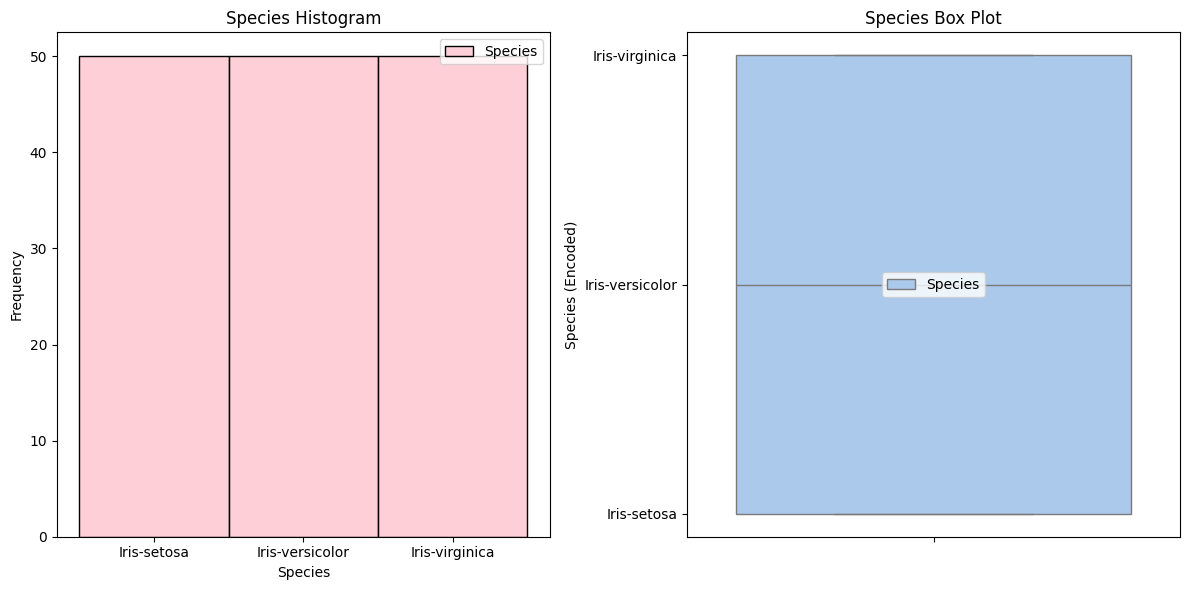

In [64]:

iris['Species_encoded'] = iris['Species'].astype('category').cat.codes

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(iris['Species'], color='pink', edgecolor='black')
plt.title('Species Histogram')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.legend(['Species'])


plt.subplot(1, 2, 2)
sns.boxplot(y='Species_encoded', data=iris, palette='pastel')
plt.title('Species Box Plot')
plt.ylabel('Species (Encoded)')
plt.yticks(ticks=range(len(iris['Species'].unique())), labels=iris['Species'].unique())
plt.legend(['Species'])

plt.tight_layout()
plt.show()


## 4). Dealing with Missing Values

In [65]:

print("Missing values in each column:")
display(iris.isnull().sum())


Missing values in each column:


,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0
Species_encoded,0


# **2). Titanic Dataset**

## 1). Dropping PassengerID Column

In [66]:

titanic.drop(columns=['PassengerId'], inplace=True, errors='ignore')

titanic.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2). Summary of Statistics

In [67]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

titanic_numerical_summary = summarize_numerical(titanic[numerical_features])
display(titanic_numerical_summary)


,Data Type,Total Instances,Number of Nulls,Number of Outliers,Min Value,Max Value,Mode,Mean,Median,Variance,Std Dev
Age,float64,891,177,2,0.42,80.0000,24.00,29.699118,28.0000,211.019125,14.526497
SibSp,int64,891,0,30,0.00,8.0000,0.00,0.523008,0.0000,1.216043,1.102743
Parch,int64,891,0,15,0.00,6.0000,0.00,0.381594,0.0000,0.649728,0.806057
Fare,float64,891,0,20,0.00,512.3292,8.05,32.204208,14.4542,2469.436846,49.693429


In [68]:

categorical_features = ['Sex', 'Embarked', 'Pclass']

def summarize_categorical(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Total Instances': len(df),
        'Number of Nulls': df.isnull().sum(),
        'Mode': df.mode().iloc[0],
        'Unique Values': df.nunique(),
        'Most Frequent Value Count': df.apply(lambda x: x.value_counts().iloc[0])
    })
    return summary

titanic_categorical_summary = summarize_categorical(titanic[categorical_features])
display(titanic_categorical_summary)


,Data Type,Total Instances,Number of Nulls,Mode,Unique Values,Most Frequent Value Count
Sex,object,891,0,male,2,577
Embarked,object,891,2,S,3,644
Pclass,int64,891,0,3,3,491


## 3). Visualization

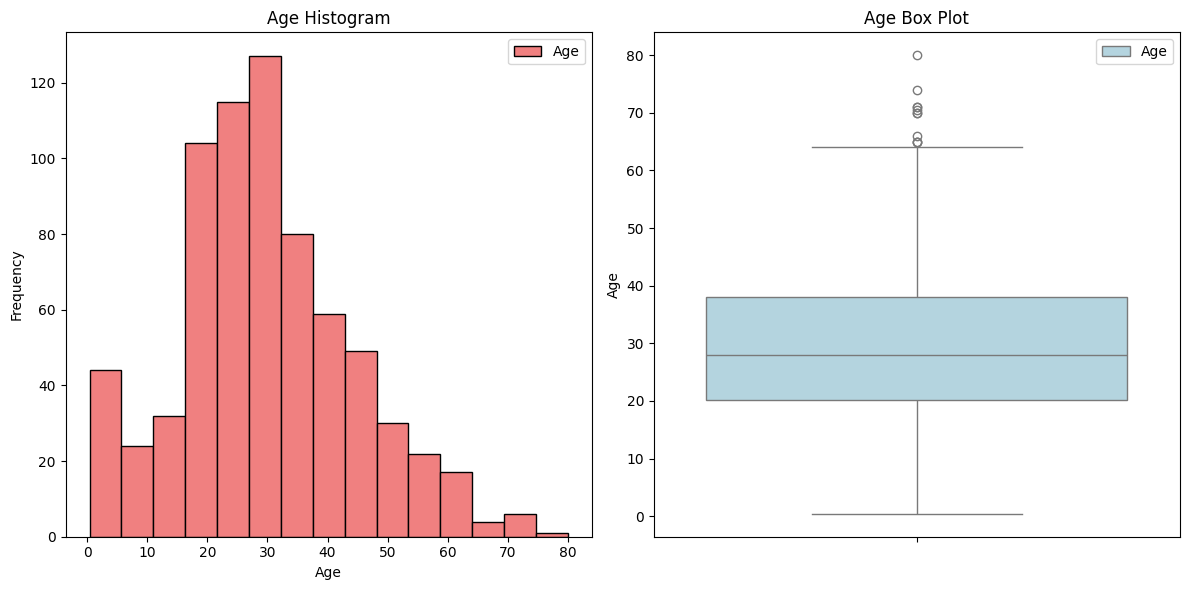

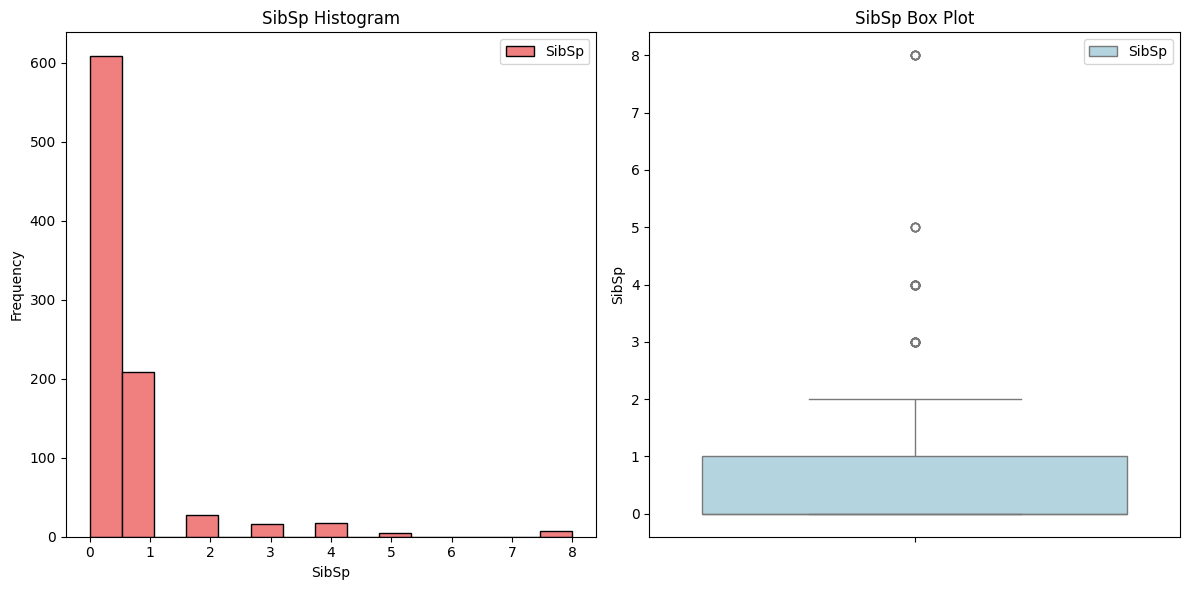

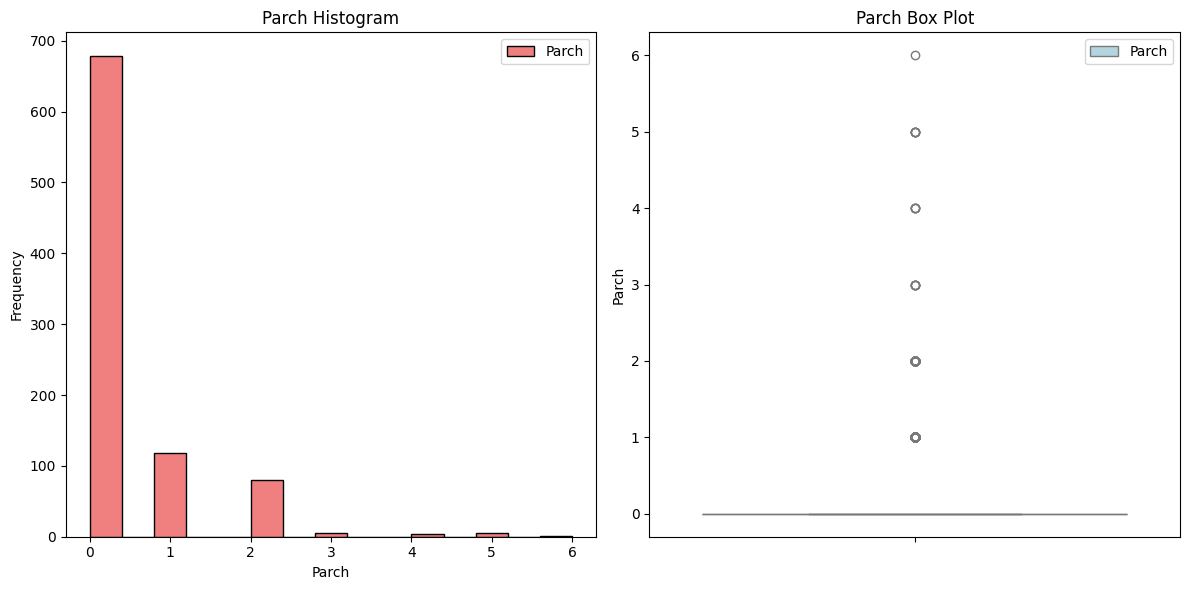

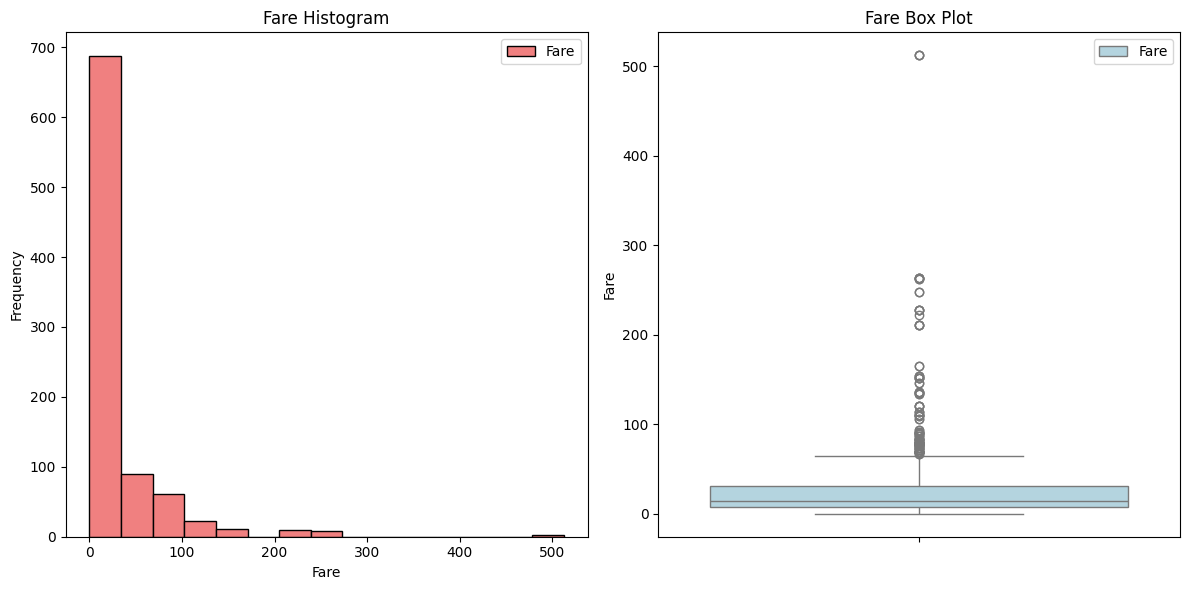

In [69]:

for column in numerical_features:
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.hist(titanic[column].dropna(), bins=15, color='lightcoral', edgecolor='black', label=column)
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()


    plt.subplot(1, 2, 2)
    sns.boxplot(y=titanic[column].dropna(), color='lightblue')
    plt.title(f'{column} Box Plot')
    plt.legend([column])

    plt.tight_layout()
    plt.show()





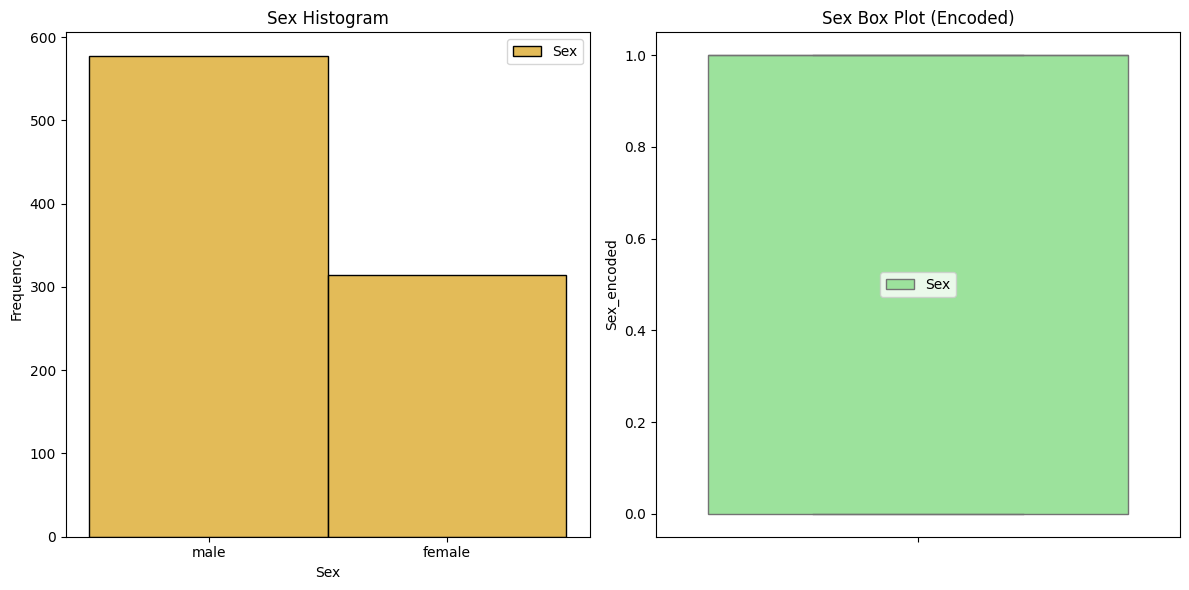

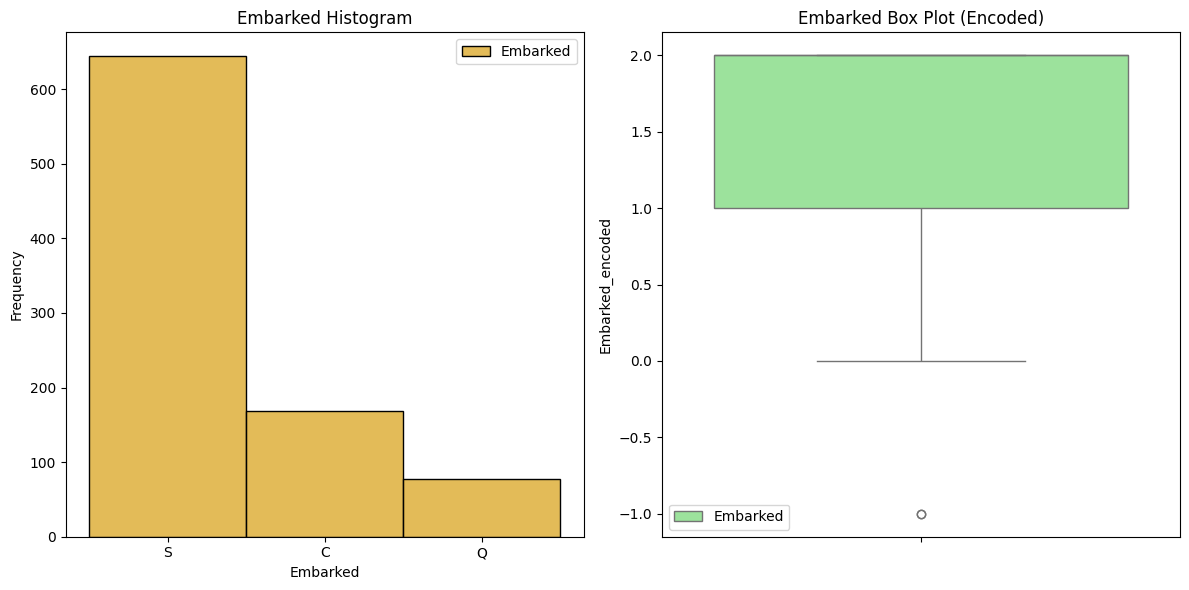

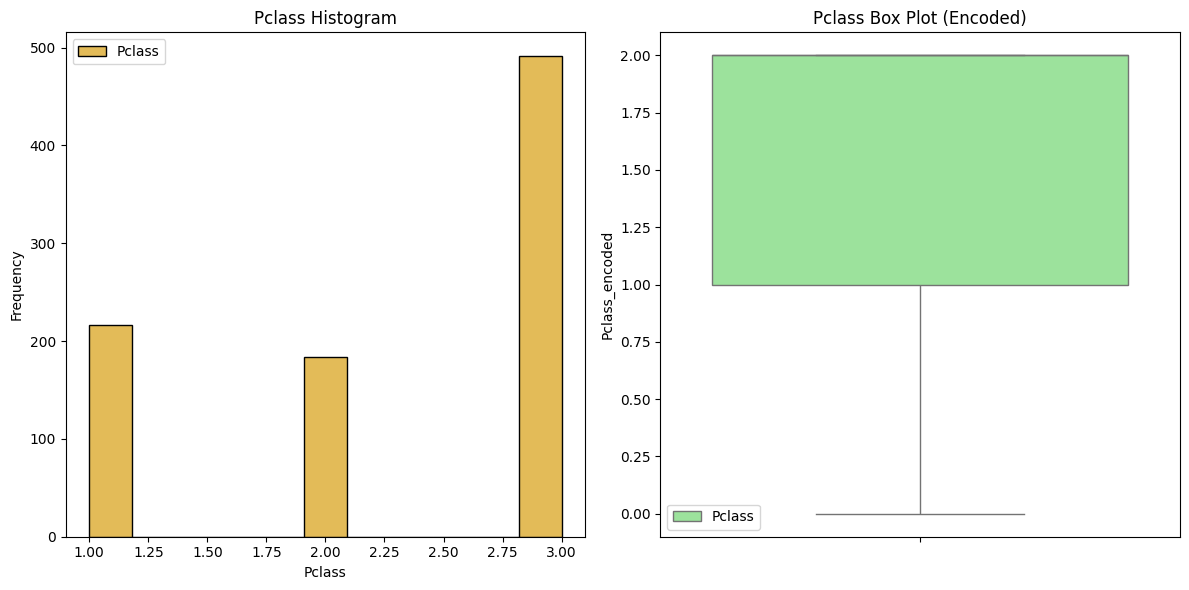

In [70]:
for column in categorical_features:
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    sns.histplot(titanic[column].dropna(), color='goldenrod', edgecolor='black')
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend([column])


    titanic[f'{column}_encoded'] = titanic[column].astype('category').cat.codes
    plt.subplot(1, 2, 2)
    sns.boxplot(y=titanic[f'{column}_encoded'], color='lightgreen')
    plt.title(f'{column} Box Plot (Encoded)')
    plt.legend([column])

    plt.tight_layout()
    plt.show()

## 4). Filling of Missing Values

In [71]:

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
missing_values = titanic[numerical_cols].isnull().sum()

print("Missing values in each numerical column:")
display(missing_values)


titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)



Missing values in each numerical column:


,0
Age,177
SibSp,0
Parch,0
Fare,0


<ipython-input-71-43e6f6306a19>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
<ipython-input-71-43e6f6306a19>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)